In [2]:
from mftool import Mftool
import numpy as np 
import pandas as pd
from pandas_datareader import data as web # Reads stock data 
import seaborn as sns
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates
import mplfinance as mpf # Matplotlib finance

import time

# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

In [3]:
pharma_basket = {}
mf = Mftool()
result = mf.get_available_schemes('Pharma')
for scheme_code, scheme in result.items():
    if 'Direct' in scheme and 'Growth' in scheme:
        #print(scheme_code, scheme)
        pharma_basket[scheme_code] = scheme

In [4]:
# Removing Bounus plan
scheme_code_to_remove = '118758'
if scheme_code_to_remove in pharma_basket:
    removed_scheme = pharma_basket.pop(scheme_code_to_remove)
    print(f"Scheme with code {scheme_code_to_remove} removed from pharma_basket.")
else:
    print(f"Scheme with code {scheme_code_to_remove} not found in pharma_basket.")

Scheme with code 118758 removed from pharma_basket.


In [5]:
hist_nav = []
for mutual_fund_code, mutual_fund in pharma_basket.items():
    df = mf.get_scheme_historical_nav(mutual_fund_code, as_Dataframe=True).reset_index()
    df['schemeName'] = mutual_fund
    #print(df.shape, df.schemeName[0])
    
    #We Will work with Nippon and Tata Funds as they have more tha 5year History
    if 'Tata' in mutual_fund or 'Nippon' in mutual_fund:
        scheme_name = df.schemeName[0].split()[0].upper()
        df[f'{scheme_name}_PHARMA'] = df['nav'].astype(float)
        df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
        df = df.sort_values('date').reset_index(drop=True)
        df = df.set_index((df.date)).drop('date', axis=1)
        df.drop(['nav','dayChange', 'schemeName'], axis=1, inplace=True)
        hist_nav.append(df)

In [6]:
com_hist_nav = pd.concat(hist_nav, axis=1).dropna()
#com_hist_nav

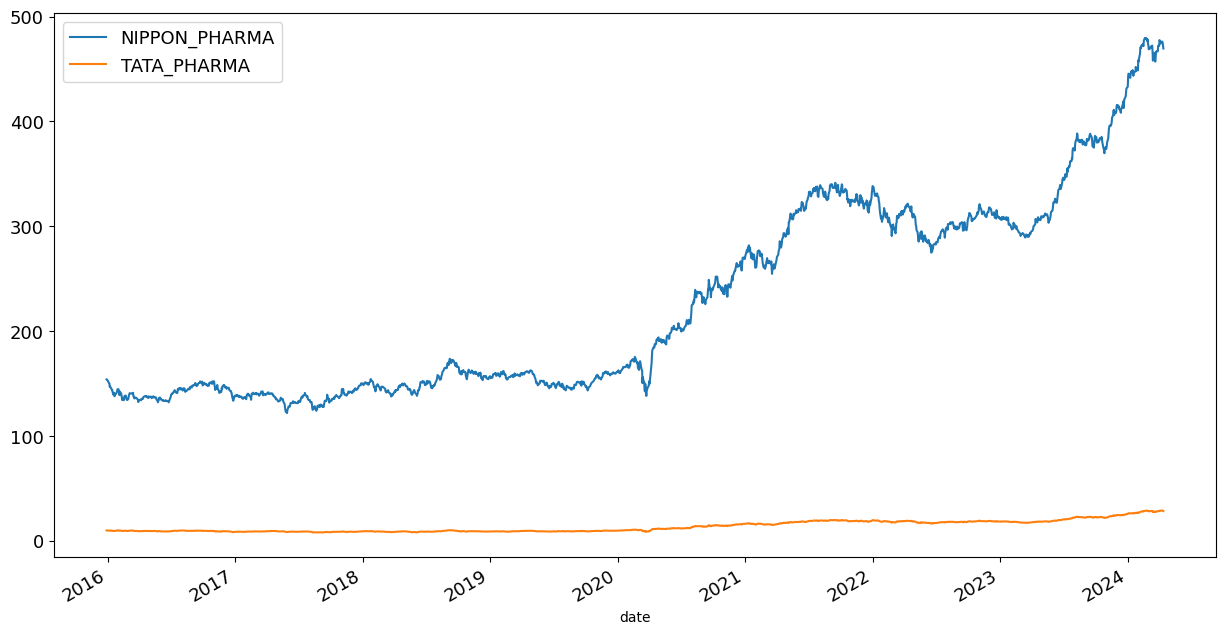

In [7]:
com_hist_nav.plot(figsize = (15,8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

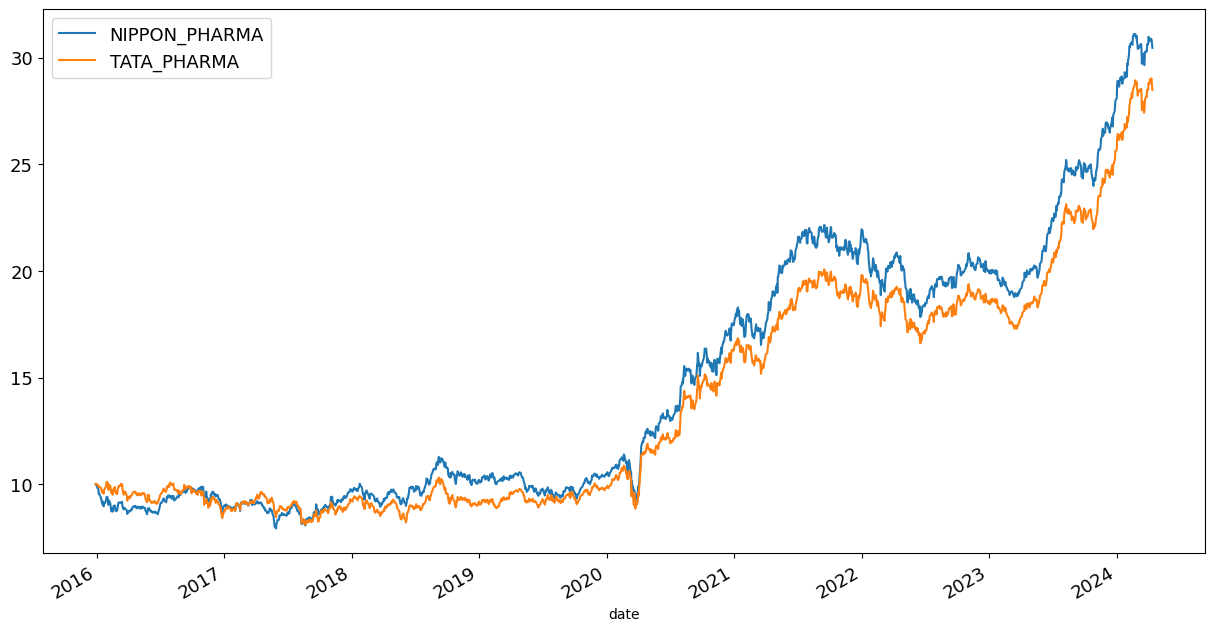

In [8]:
#Normalising Values to NAV 10
start_value = com_hist_nav.iloc[0]
norm_com_hist_nav = com_hist_nav.div(start_value).mul(10)
norm_com_hist_nav.plot(figsize = (15,8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [9]:
parag_flexi_cap = {}
flexi_cap = mf.get_available_schemes('Parag')
for scheme_code, scheme in flexi_cap.items():
    if 'Direct' in scheme and 'Flexi' in scheme:
        #print(scheme_code, scheme)
        parag_flexi_cap[scheme_code] = scheme

In [10]:
for mutual_fund_code, mutual_fund in parag_flexi_cap.items():
    flexi_cap_hist_nav = mf.get_scheme_historical_nav(mutual_fund_code, as_Dataframe=True).reset_index()
    flexi_cap_hist_nav['schemeName'] = mutual_fund
    print(flexi_cap_hist_nav.shape, flexi_cap_hist_nav.schemeName[0])
    scheme_name = flexi_cap_hist_nav.schemeName[0].split()[0].upper()
    flexi_cap_hist_nav[f'{scheme_name}_FLEXI_CAP'] = flexi_cap_hist_nav['nav'].astype(float)
    flexi_cap_hist_nav['date'] = pd.to_datetime(flexi_cap_hist_nav['date'], format='%d-%m-%Y')
    flexi_cap_hist_nav = flexi_cap_hist_nav.sort_values('date').reset_index(drop=True)
    flexi_cap_hist_nav = flexi_cap_hist_nav.set_index((flexi_cap_hist_nav.date)).drop('date', axis=1)
    flexi_cap_hist_nav.drop(['nav','dayChange', 'schemeName'], axis=1, inplace=True)

(2675, 4) Parag Parikh Flexi Cap Fund - Direct Plan - Growth


In [11]:
#flexi_cap_hist_nav

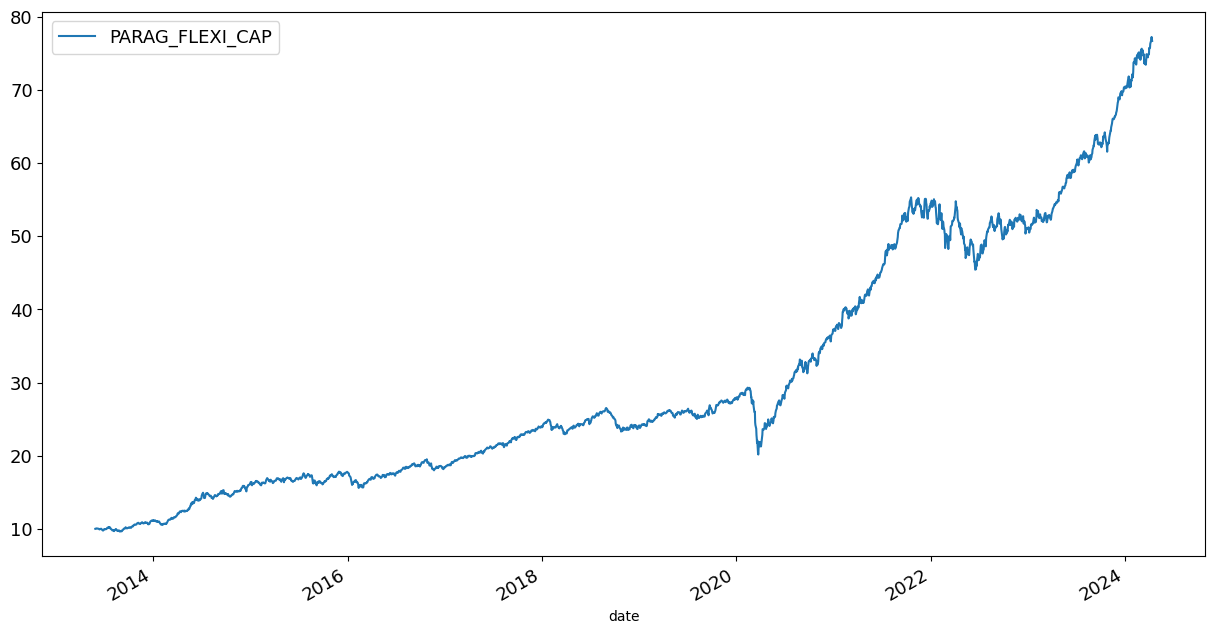

In [12]:
flexi_cap_hist_nav.plot(figsize = (15,8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

120197 ICICI Prudential Liquid Fund - Direct Plan - Growth
(3540, 4) ICICI Prudential Liquid Fund - Direct Plan - Growth


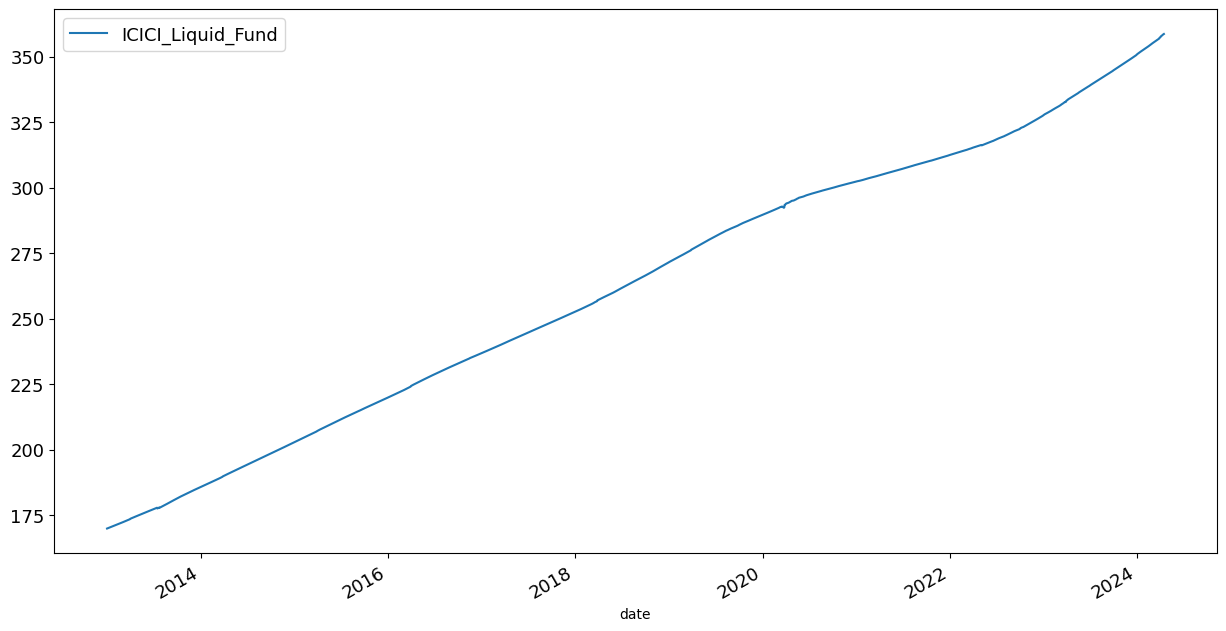

In [13]:
gilt_fund = {}
result = mf.get_available_schemes('ICICI Prudential Liquid')
for scheme_code, scheme in result.items():
    if 'Direct' in scheme and 'Growth' in scheme:
        print(scheme_code, scheme)
        gilt_fund[scheme_code] = scheme

for mutual_fund_code, mutual_fund in gilt_fund.items():
    gilt_fund_hist_nav = mf.get_scheme_historical_nav(mutual_fund_code, as_Dataframe=True).reset_index()
    gilt_fund_hist_nav['schemeName'] = mutual_fund
    print(gilt_fund_hist_nav.shape, gilt_fund_hist_nav.schemeName[0])
    scheme_name = gilt_fund_hist_nav.schemeName[0].split()[0].upper()
    gilt_fund_hist_nav[f'{scheme_name}_Liquid_Fund'] = gilt_fund_hist_nav['nav'].astype(float)
    gilt_fund_hist_nav['date'] = pd.to_datetime(gilt_fund_hist_nav['date'], format='%d-%m-%Y')
    gilt_fund_hist_nav = gilt_fund_hist_nav.sort_values('date').reset_index(drop=True)
    gilt_fund_hist_nav = gilt_fund_hist_nav.set_index((gilt_fund_hist_nav.date)).drop('date', axis=1)
    gilt_fund_hist_nav.drop(['nav','dayChange', 'schemeName'], axis=1, inplace=True)

gilt_fund_hist_nav.plot(figsize = (15,8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

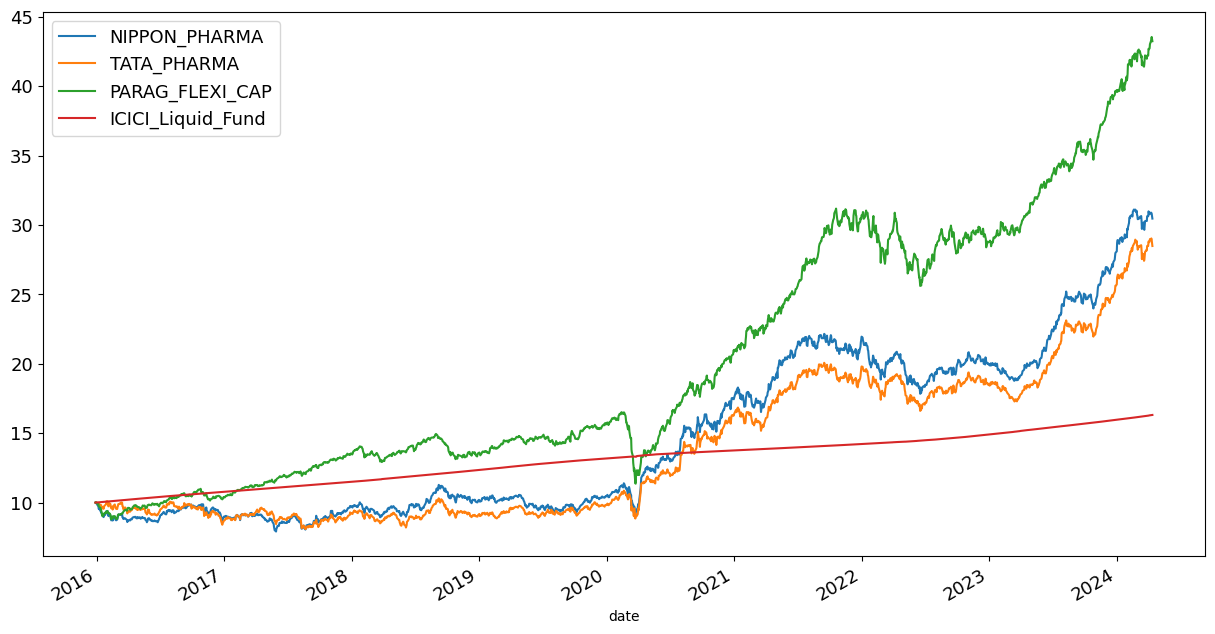

In [14]:
fund_comp = pd.concat([com_hist_nav, flexi_cap_hist_nav, gilt_fund_hist_nav], axis=1).dropna()

#Normalising Values to NAV 10
start_value = fund_comp.iloc[0]
norm_com_hist_nav = fund_comp.div(start_value).mul(10)
norm_com_hist_nav.plot(figsize = (15,8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [15]:
# Liquid fund Returns
returns = fund_comp['ICICI_Liquid_Fund'].pct_change()
num_years = len(returns) / 252  # Assuming 252 trading days in a year
# Calculate the CAGR returns
cagr_returns = (np.exp(np.log(returns + 1).sum() / num_years) - 1)
print("CAGR returns over the entire period:", cagr_returns*100)

CAGR returns over the entire period: 6.2553575260828165


In [16]:
#fund_comp
def calculate_rolling_metrics(data, returns_column, risk_free_rate, window_daily=252, window_monthly=12):
    """
    Calculate rolling metrics including rolling return, Sharpe ratio, and Sortino ratio.
    Parameters:
        data (DataFrame): DataFrame containing returns data.
        returns_column (str): Name of the column containing returns data.
        risk_free_rate (float): Risk-free rate for calculating Sharpe and Sortino ratios.
        window_daily (int): Window size for daily rolling calculations (default: 252).
        window_monthly (int): Window size for monthly rolling calculations (default: 12).
    Returns:
        DataFrame: DataFrame containing calculated rolling metrics.
    """
    # Calculate daily return
    daily_ret = data[returns_column].pct_change().dropna()
    daily_roll_ret = daily_ret.rolling(window=window_daily).mean().mul(100)
    
    # Calculate monthly return
    monthly_ret = data[returns_column].resample('M').apply(lambda x: x[-1]/x[0] - 1)
    monthly_roll_ret = monthly_ret.rolling(window=window_monthly).mean().mul(100)
    
    # Calculate Rolling Sharpe Ratio
    roll_sharpe = ((daily_ret.rolling(window=window_daily).mean()) / daily_ret.rolling(window=window_daily).std())*np.sqrt(252)

    # Calculate daily return downside deviation for Sortino Ratio
    negative_returns = daily_ret[daily_ret < 0]
    down_dev = negative_returns.rolling(window=window_daily).std()

    # Calculate Rolling Sortino Ratio
    roll_sortino = (daily_ret.rolling(window=window_daily).mean()) / down_dev

    # Create DataFrame for results
    rolling_metrics = pd.DataFrame({
        'DAILY': daily_roll_ret,
        'MONTHLY': monthly_roll_ret,
        'SHARPE_RATIO': roll_sharpe,
        'SORTION_RATIO': roll_sortino,
        'DOWNSIDE_DEVIATION':down_dev
    })
    return rolling_metrics

In [17]:
risk_free_rate = cagr_returns

window_daily = 252
window_monthly = 12

# Calculate rolling metrics
nippon_rolling_metrics = calculate_rolling_metrics(fund_comp, 'NIPPON_PHARMA', risk_free_rate, window_daily, window_monthly)
tata_rolling_metrics = calculate_rolling_metrics(fund_comp, 'TATA_PHARMA', risk_free_rate, window_daily, window_monthly)
parag_rolling_metrics = calculate_rolling_metrics(fund_comp, 'PARAG_FLEXI_CAP', risk_free_rate, window_daily, window_monthly)


In [18]:
# Rolling Dataframe
daily_roll_stat = pd.concat([nippon_rolling_metrics.DAILY, tata_rolling_metrics.DAILY, parag_rolling_metrics.DAILY], axis=1).dropna()
daily_roll_stat.columns = ['Nippon', 'Tata', 'Parag']

summary = daily_roll_stat.agg(['mean', 'std']).T
summary.columns = ['RETURN', 'RISK']
summary.RETURN = summary.RETURN * 252
summary.RISK = summary.RISK * np.sqrt(252)

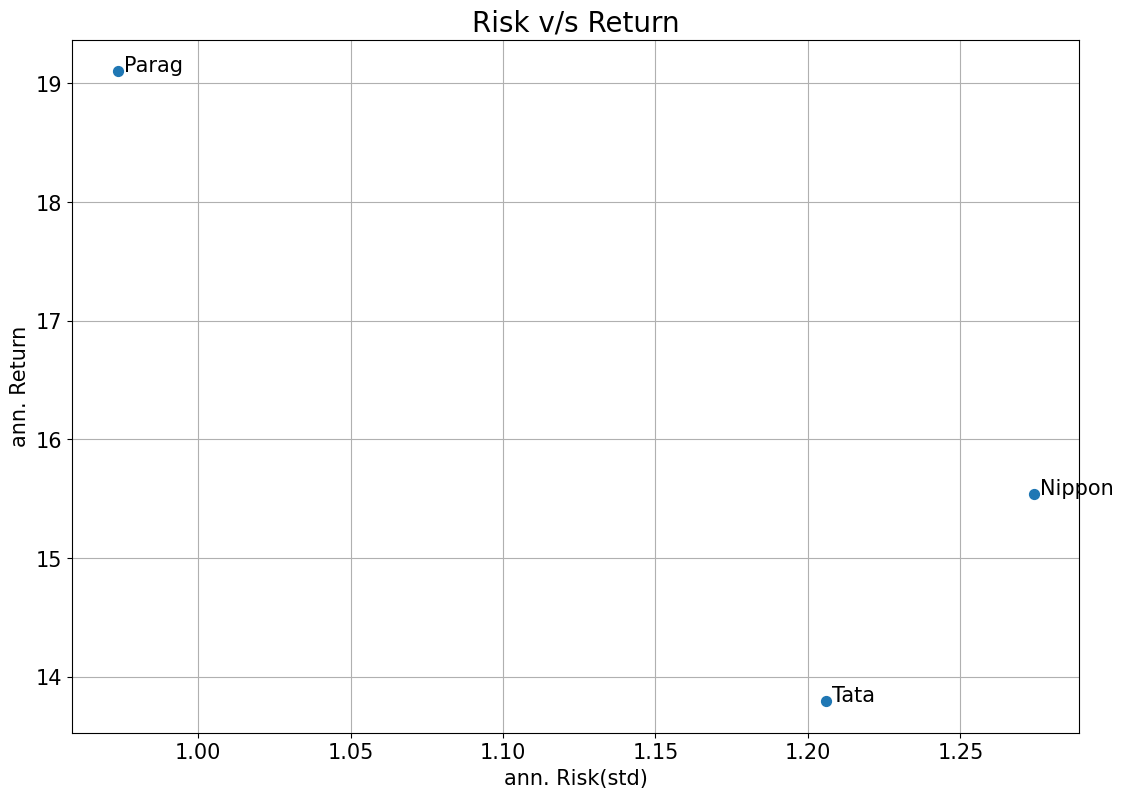

In [19]:
summary.plot(kind = "scatter", x = "RISK", y = "RETURN", figsize = (13,9), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "RISK"]+0.002, summary.loc[i, "RETURN"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk v/s Return", fontsize = 20)
plt.grid()
plt.show()

In [20]:
summary['SHARPE'] = (summary['RETURN'].sub(risk_free_rate))/summary['RISK']

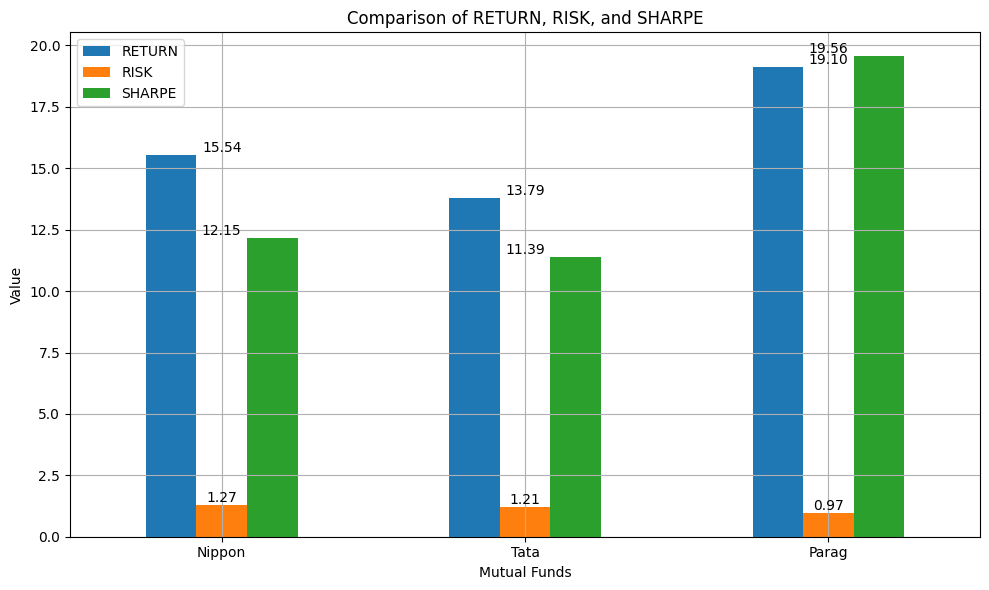

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))

# Grouped bar plot
summary.plot(kind='bar', ax=ax)
for i in range(len(summary)):
    for col in summary.columns:
        value = summary.iloc[i][col]
        ax.annotate(f'{value:.2f}', xy=(i, value), ha='center', va='bottom')

ax.set_ylabel('Value')
ax.set_xlabel('Mutual Funds')
ax.set_title('Comparison of RETURN, RISK, and SHARPE')
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid()
plt.show()

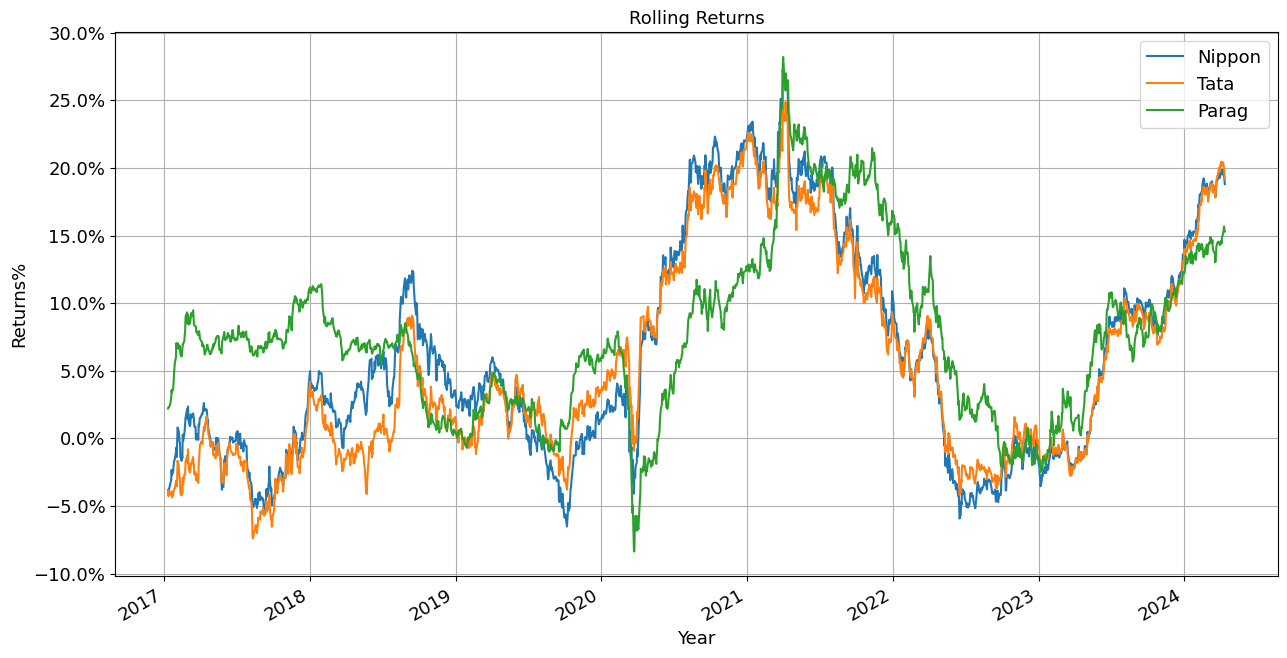

In [22]:
import matplotlib.ticker as ticker
import cufflinks as cf

ax = daily_roll_stat.plot(figsize=(15, 8), fontsize=13)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax = 1))

plt.legend(fontsize = 13)
plt.title('Rolling Returns',fontsize = 13)
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Returns%', fontsize = 13)
plt.grid()
plt.show()

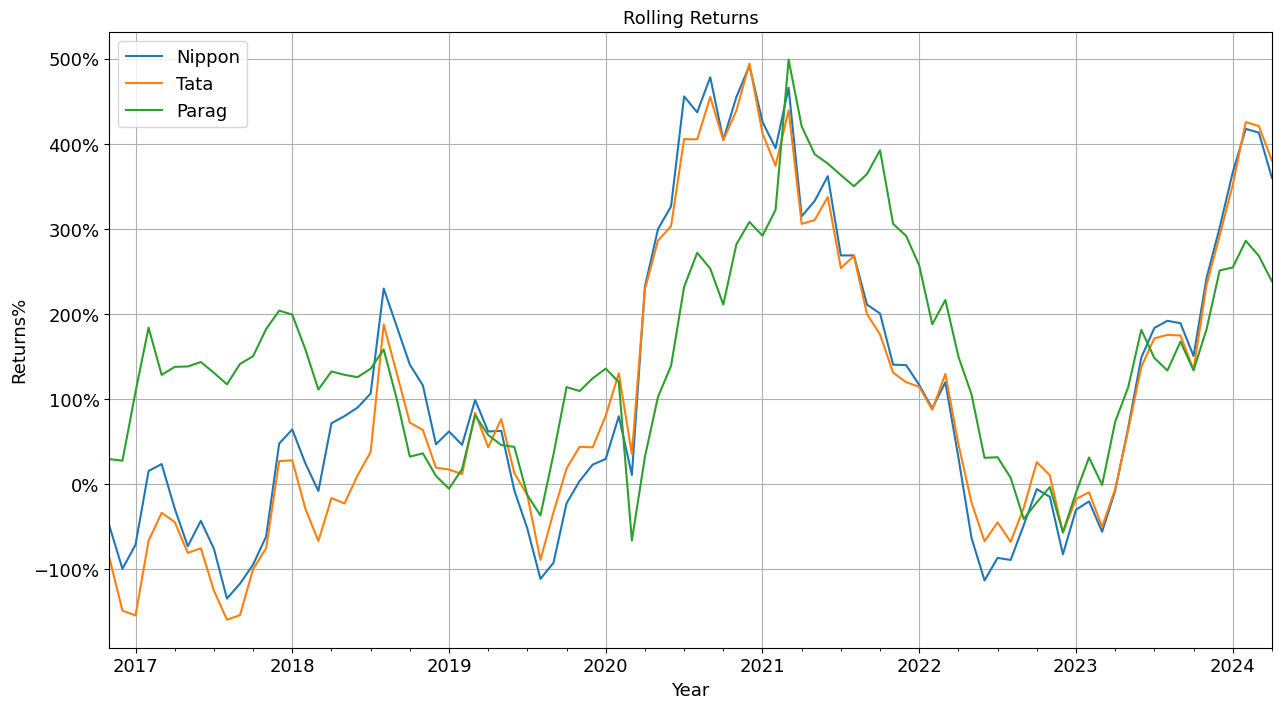

In [23]:

mon_roll_stat = pd.concat([nippon_rolling_metrics.MONTHLY, tata_rolling_metrics.MONTHLY, parag_rolling_metrics.MONTHLY], axis=1).dropna()
mon_roll_stat.columns = ['Nippon', 'Tata', 'Parag']

ax = mon_roll_stat.plot(figsize=(15, 8), fontsize=13)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax = 1))

plt.legend(fontsize = 13)
plt.title('Rolling Returns',fontsize = 13)
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Returns%', fontsize = 13)
plt.grid()
plt.show()

In [24]:
sharpe_stats= pd.concat([nippon_rolling_metrics.SHARPE_RATIO, tata_rolling_metrics.SHARPE_RATIO, parag_rolling_metrics.SHARPE_RATIO], axis=1).dropna()
sharpe_stats.columns = ['Nippon', 'Tata', 'Parag']

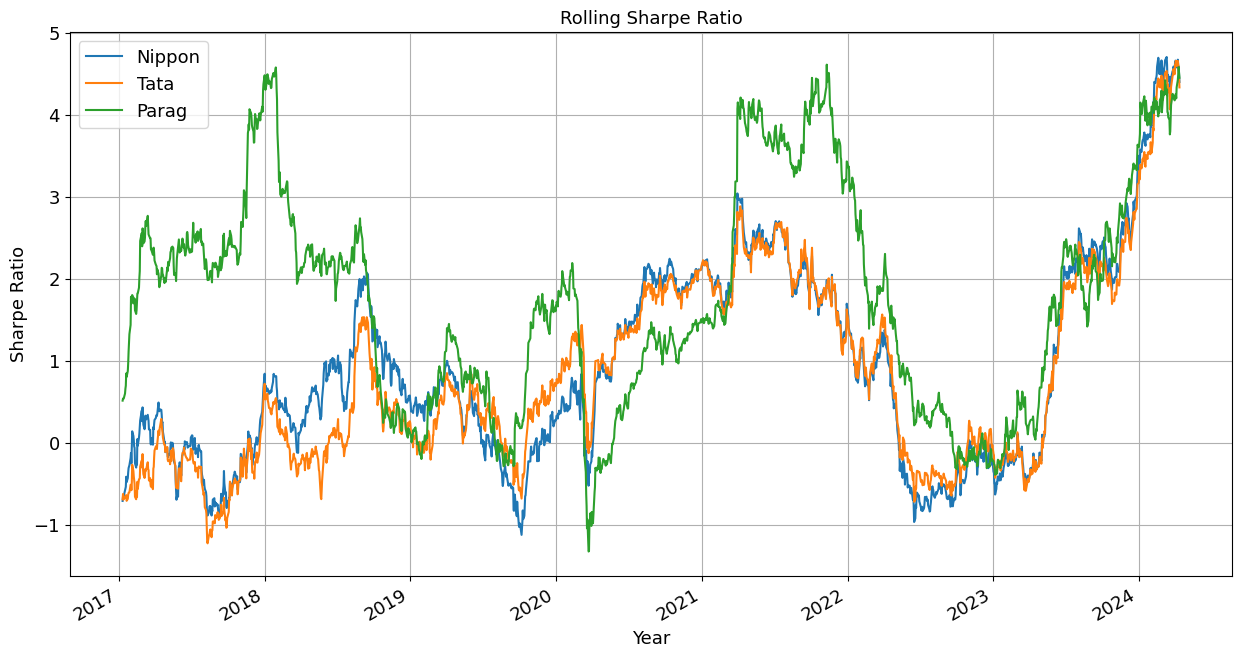

In [25]:
ax = sharpe_stats.plot(figsize=(15, 8), fontsize=13)
#ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax = 1))

plt.legend(fontsize = 13)
plt.title('Rolling Sharpe Ratio',fontsize = 13, loc='center')
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Sharpe Ratio', fontsize = 13)
plt.grid()
plt.show()

In [26]:
#Rolling Sharpe ration tell us about the Time-varying performance of the stratagey took by the fund manager, 
#in particular it tells whether it has performed consistently, Second it also the the investor to identify when the stratagey tends to underperform 
#i.e Does the stratagey performs badly during market selloffs or during rallies hence help whether stratagey is good hedge against the crises times

In [27]:
sortion_stats= pd.concat([nippon_rolling_metrics.SORTION_RATIO, tata_rolling_metrics.SORTION_RATIO, parag_rolling_metrics.SORTION_RATIO], axis=1).dropna()
sortion_stats.columns = ['Nippon', 'Tata', 'Parag']

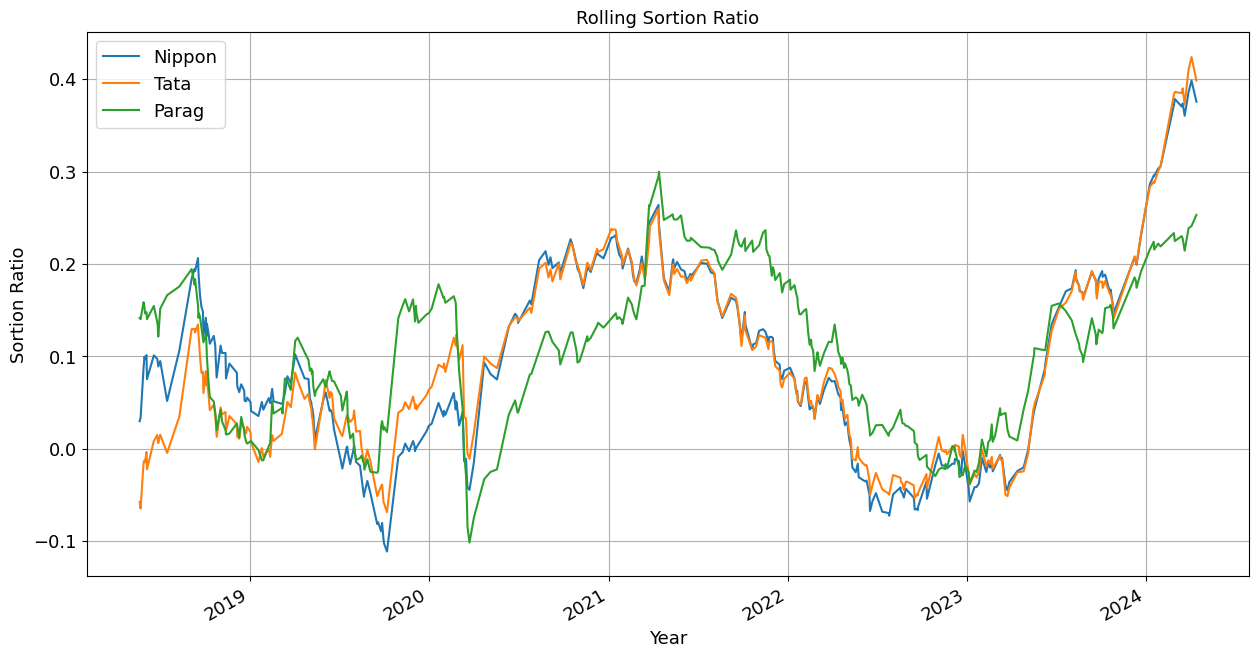

In [28]:
ax = sortion_stats.plot(figsize=(15, 8), fontsize=13)
#ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax = 1))

plt.legend(fontsize = 13)
plt.title('Rolling Sortion Ratio',fontsize = 13, loc='center')
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Sortion Ratio', fontsize = 13)
plt.grid()
plt.show()

In [29]:
downside_stats= pd.concat([nippon_rolling_metrics.DOWNSIDE_DEVIATION, tata_rolling_metrics.DOWNSIDE_DEVIATION, parag_rolling_metrics.DOWNSIDE_DEVIATION], axis=1).dropna()
downside_stats.columns = ['Nippon', 'Tata', 'Parag']

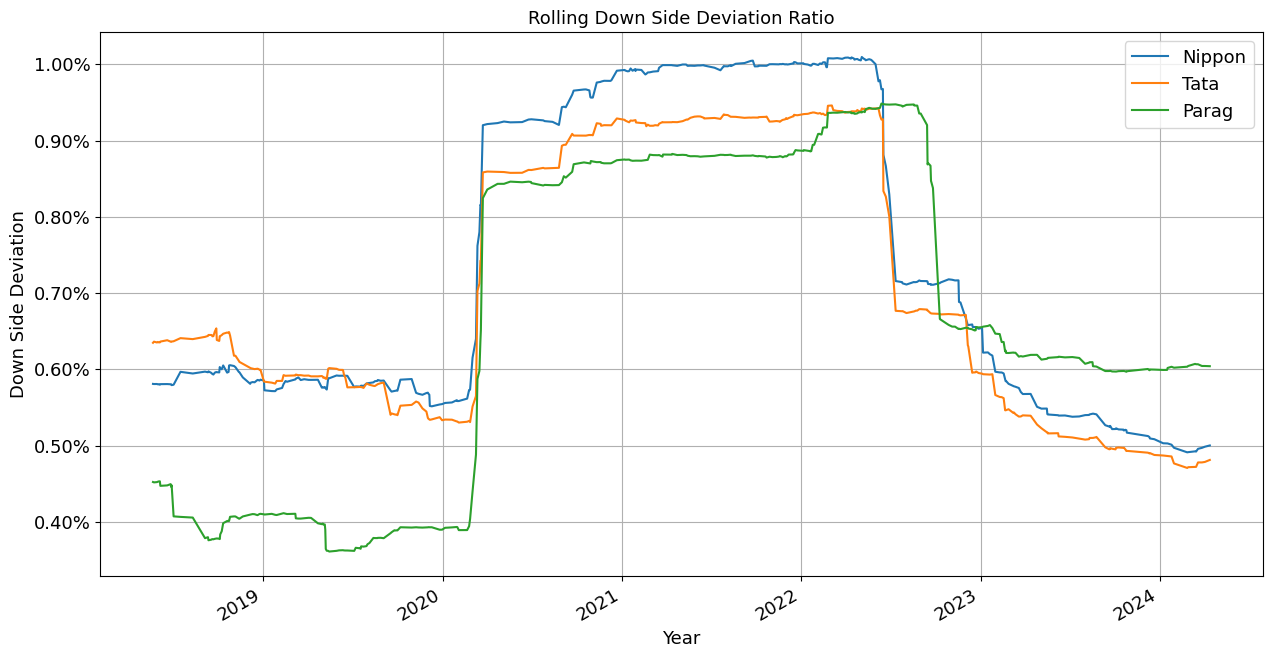

In [30]:
ax = downside_stats.plot(figsize=(15, 8), fontsize=13)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax = 1))

plt.legend(fontsize = 13)
plt.title('Rolling Down Side Deviation Ratio',fontsize = 13, loc='center')
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Down Side Deviation', fontsize = 13)
plt.grid()
plt.show()

In [31]:
from qstrader.statistics import tearsheet as ts
